# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
#Your code here 
import json
f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [4]:
#Your code here
data.keys()

dict_keys(['meta', 'data'])

In [6]:
print(type(data['meta']))
print(type(data['data']))

<class 'dict'>
<class 'list'>


In [7]:
print(data['meta'].keys())

dict_keys(['view'])


In [13]:
print(len(data['data']))
print(type(data['data'][0]))
print(len(data['data'][0]))
print(type(data['data'][0][0]))
print(data['data'][0][1])

60266
<class 'list'>
42
<class 'int'>
FF49C41F-CE8D-46C4-9164-653B1227CF6F


In [27]:
print(len(data['meta']['view'].keys()))
print(data['meta']['view'].keys())

40
dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])


## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [31]:
#Your code here
import pandas as pd
df = pd.DataFrame(data['data'])
df.columns = [item['name'] for item in data['meta']['view']['columns']]
print(df.shape)
df.head()

(60266, 42)


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


In [50]:
df[df['Topic'] == 'Asthma']['Question'].value_counts()

Current asthma prevalence among adults aged >= 18 years                                    870
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       870
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    870
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       870
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    870
Asthma prevalence among women aged 18-44 years                                             325
Name: Question, dtype: int64

## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [51]:
cols = ['LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'YearStart', 'YearEnd', 'DataValue']
view = df[df.Question == 'Current asthma prevalence among adults aged >= 18 years'][cols]
view.head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue
4725,IL,Illinois,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.5
5529,IN,Indiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.7
5632,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,5.6
6777,KS,Kansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.1
7034,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.9


In [52]:
view.sort_values('LocationAbbr').head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue
9797,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None
10013,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,10.3
9427,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9
9959,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None
9905,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None


In [54]:
df.StratificationCategoryID1.value_counts()

RACE       38060
GENDER     13962
OVERALL     8244
Name: StratificationCategoryID1, dtype: int64

In [62]:
view = df[(df.Question == 'Current asthma prevalence among adults aged >= 18 years')
          & (df.StratificationCategoryID1 == 'OVERALL')]
print(view.shape)
view.head()

(110, 42)


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9370,9368,DA78CA14-AF4B-49EA-9B9D-5D01C233A286,9368,1527194523,959778,1527194523,959778,None,2016,2016,...,59,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9373,9371,5FCE0D49-11FD-4545-B9E7-14F503123105,9371,1527194523,959778,1527194523,959778,None,2016,2016,...,04,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [63]:
view.DataValueTypeID.value_counts()

CRDPREV       55
AGEADJPREV    55
Name: DataValueTypeID, dtype: int64

In [64]:
view = df[(df.Question == 'Current asthma prevalence among adults aged >= 18 years')
         & (df.StratificationCategoryID1 == 'OVERALL')
          & (df.DataValueTypeID == 'CRDPREV')]
view = view.sort_values('LocationAbbr')
print(view.shape)
view[cols].head()

(55, 42)


,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue
9372,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,8.8
9371,AL,Alabama,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9.7
9374,AR,Arkansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,8.5
9373,AZ,Arizona,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9.4
9375,CA,California,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,7.8


In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Percentage of Adults with Asthma')

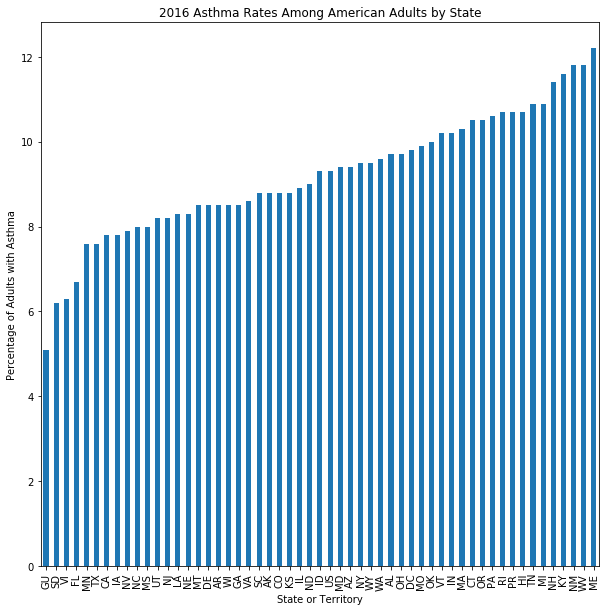

In [68]:
view.DataValue = view.DataValue.astype(float)
view = view.sort_values('DataValue')
view.set_index('LocationAbbr')['DataValue'].plot(kind='bar', figsize=(10,10))
plt.title('2016 Asthma Rates Among American Adults by State')
plt.xlabel('State or Territory')
plt.ylabel('Percentage of Adults with Asthma')

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!